# Objective

Passengers: Less waiting, smooth schedules, prioritize safety.

Airlines: Save money, happy customers, efficient resources.

Air Traffic Control: Smooth flow, safety first, efficient airspace.

# Understanding the data

# Columns and its explainations

Year: The year in which the flight occurred.
    
Month: The month in which the flight occurred.
    
DayofMonth: The day of the month on which the flight occurred.
    
DayOfWeek: The day of the week on which the flight occurred.
    
DepTime: The actual departure time of the flight in decimal hours.
    
CRSDepTime: The scheduled departure time of the flight in 24-hour format.
    
ArrTime: The actual arrival time of the flight in decimal hours.
    
CRSArrTime: The scheduled arrival time of the flight in 24-hour format.
    
UniqueCarrier: A code or identifier representing the unique carrier or airline for the flight.
    
TaxiIn: The time in minutes from landing to gate (arrival taxi time).
    
TaxiOut: The time in minutes from gate to takeoff (departure taxi time).
    
Cancelled: A binary indicator (1 or 0) to denote whether the flight was canceled (1 for true, 0 for false).
    
CancellationCode: A code indicating the reason for flight cancellation, if applicable.
    
Diverted: A binary indicator (1 or 0) to denote whether the flight was diverted (1 for true, 0 for false).
    
CarrierDelay: The delay in minutes caused by the airline.
    
WeatherDelay: The delay in minutes caused by weather conditions.
    
NASDelay: The delay in minutes caused by the National Airspace System.
    
SecurityDelay: The delay in minutes caused by security-related issues.
    
LateAircraftDelay: The delay in minutes caused by a late-arriving aircraft.
    

# This dataset is composed by the following variables

Year: 2008

Month: 1-12

DayofMonth: 1-31

DayOfWeek: 1 (Monday) - 7 (Sunday)

DepTime: Actual departure time (local, hhmm)

CRSDepTime: Scheduled departure time (local, hhmm), (Computerized Reservation System)

ArrTime: Actual arrival time (local, hhmm)

CRSArrTime: Scheduled arrival time (local, hhmm), (Computerized Reservation System)

UniqueCarrier: Unique carrier code

FlightNum: Flight number

TailNum: plane tail number: aircraft registration, unique aircraft identifier

ActualElapsedTime: in minutes

CRSElapsedTime: in minutes, (Computerized Reservation System)

AirTime: in minutes

ArrDelay: arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).

DepDelay: departure delay, in minutes

Origin: origin IATA airport code

Dest: destination IATA airport code

Distance: in miles

TaxiIn: taxi in time, in minutes

TaxiOut: taxi out time in minutes

Cancelled: *was the flight cancelled

CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

Diverted: 1 = yes, 0 = no

CarrierDelay: in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.

WeatherDelay: in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

NASDelay: in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.

SecurityDelay: in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach,inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

LateAircraftDelay: in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']

['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver', 'EWR: Newark', 'LAX: Los Ángeles', 'IAH: Houston', 'PHX: Phoenix', 'DTW: Detroit', 'SFO: San Francisco', 'LAS: Las Vegas', 'JFK: New York', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'MCO: Orlando', 'MSP: Minneapolis', 'BOS Boston', 'PHL Philadelphia']

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("DelayedFlights.csv")

In [3]:
df.shape

(1936758, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

# Data Cleaning 

In [5]:
df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [6]:
df.shape[0]

1936758

In [7]:
# Display or print the null percentage for each column

null_percentage = round((df.isnull().sum()*100)/df.shape[0],2).sort_values(ascending = False)
null_percentage = round((df.isnull().sum()*100)/df.shape[0],2).astype(str)+'%'
sorted_null_percentages = pd.DataFrame(null_percentage, columns=['Null Percentage']).sort_values(by='Null Percentage', ascending=False)

print(sorted_null_percentages)

                  Null Percentage
LateAircraftDelay          35.59%
SecurityDelay              35.59%
NASDelay                   35.59%
WeatherDelay               35.59%
CarrierDelay               35.59%
ActualElapsedTime           0.43%
AirTime                     0.43%
ArrDelay                    0.43%
TaxiIn                      0.37%
ArrTime                     0.37%
TaxiOut                     0.02%
CRSElapsedTime              0.01%
CRSArrTime                   0.0%
Month                        0.0%
DayofMonth                   0.0%
DayOfWeek                    0.0%
DepTime                      0.0%
Diverted                     0.0%
CancellationCode             0.0%
Cancelled                    0.0%
Distance                     0.0%
UniqueCarrier                0.0%
Dest                         0.0%
Origin                       0.0%
DepDelay                     0.0%
Year                         0.0%
CRSDepTime                   0.0%
TailNum                      0.0%
FlightNum     

In [8]:
# Fill null values in 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay' with 0
df['CarrierDelay'].fillna(0, inplace=True)
df['WeatherDelay'].fillna(0, inplace=True)
df['NASDelay'].fillna(0, inplace=True)
df['SecurityDelay'].fillna(0, inplace=True)
df['LateAircraftDelay'].fillna(0, inplace=True)

# Data Transformation

In [9]:
cancelled_diverted_df = df[(df['Diverted'] == 1) | (df['ActualElapsedTime'].isna())]

cancelled_diverted_df.drop("ArrTime", 1, inplace=True) #1 for column
cancelled_diverted_df.drop("ActualElapsedTime", 1, inplace=True) #1 for column
cancelled_diverted_df.drop("CRSElapsedTime", 1, inplace=True) #1 for column
cancelled_diverted_df.drop("AirTime", 1, inplace=True) #1 for column
cancelled_diverted_df.drop("ArrDelay", 1, inplace=True) #1 for column
cancelled_diverted_df.drop("TaxiIn", 1, inplace=True) #1 for column
cancelled_diverted_df.drop("TaxiOut", 1, inplace=True) #1 for column
cancelled_diverted_df.drop("CarrierDelay", 1, inplace=True) #1 for column
cancelled_diverted_df.drop("WeatherDelay", 1, inplace=True) #1 for column
cancelled_diverted_df.drop("NASDelay", 1, inplace=True) #1 for column
cancelled_diverted_df.drop("SecurityDelay", 1, inplace=True) #1 for column
cancelled_diverted_df.drop("LateAircraftDelay", 1, inplace=True) #1 for column

# Print the new DataFrame
cancelled_diverted_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted
1280,1763,2008,1,3,4,922.0,915,1050,WN,1069,N630WN,7.0,SAN,SMF,480,0,N,1
1372,1911,2008,1,3,4,2325.0,1900,2030,WN,2092,N302SW,265.0,SFO,SAN,447,0,N,1
1776,2651,2008,1,4,5,1949.0,1905,1910,WN,1403,N504SW,44.0,BOI,RNO,335,0,N,1
1831,2726,2008,1,4,5,737.0,705,825,WN,178,N718SW,32.0,BUR,SMF,358,0,N,1
2244,3672,2008,1,4,5,1849.0,1630,1755,WN,239,N636WN,139.0,LAS,RNO,345,0,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935651,7006289,2008,12,10,3,1459.0,1447,1650,DL,1706,N914DN,12.0,ATL,BUF,712,1,A,0
1935716,7006401,2008,12,11,4,1355.0,1106,1950,DL,26,N3747D,169.0,LAX,JFK,2475,0,N,1
1935876,7006809,2008,12,11,4,1026.0,955,1219,DL,892,N928DL,31.0,ATL,JFK,760,1,A,0
1935978,7007034,2008,12,11,4,1527.0,1520,1708,DL,1102,N924DL,7.0,IAD,ATL,533,0,N,1


In [10]:
# Create Date from 3 columns:

df["DepDate"] = pd.to_datetime(df.Year*10000 + 
                              df.Month*100 +
                              df.DayofMonth, format="%Y%m%d")

In [11]:
df.dropna(subset=['ArrTime'], inplace=True)
df.dropna(subset=['ArrDelay'], inplace=True)
df.dropna(subset=["TailNum"], inplace=True)
df.drop(columns=["Cancelled"], inplace=True)
df.drop(columns=["Diverted"], inplace=True)
df = df.drop("Unnamed: 0", 1) #1 for column
df = df.drop("Year", 1) #1 for column

In [12]:
df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CancellationCode     0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
DepDate              0
dtype: int64

# Data analysis and Data Visualization 

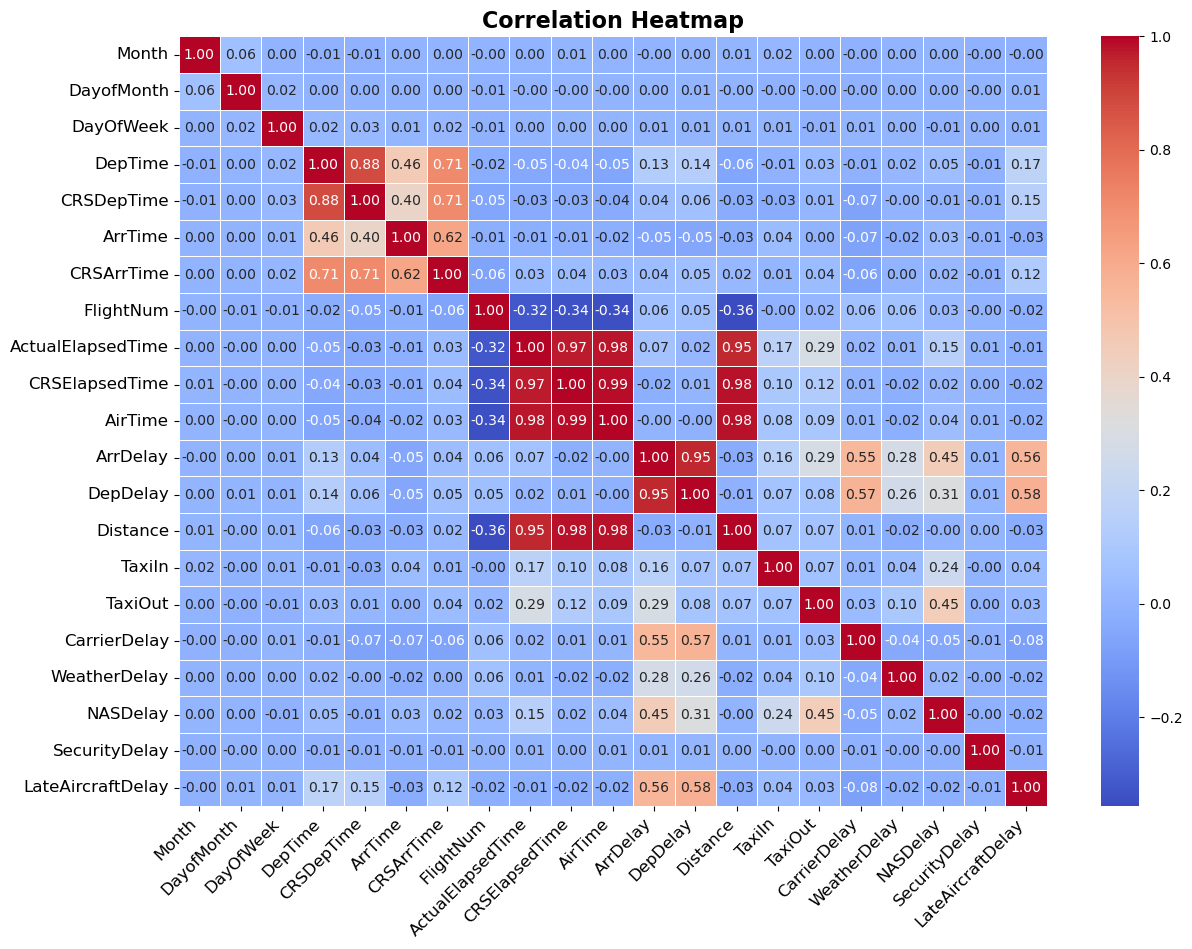

In [13]:
correlation_matrix = df.corr()

# Set up the Matplotlib figure
plt.figure(figsize=(14, 10))

# Plot the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Customize the appearance
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set y-axis labels to be more readable
plt.yticks(np.arange(0.5, len(correlation_matrix.index), 1), correlation_matrix.index, rotation=0, fontsize=12)

# Show the plot
plt.show()

In [14]:
cancelled_diverted_df.isnull().sum()

Unnamed: 0          0
Year                0
Month               0
DayofMonth          0
DayOfWeek           0
DepTime             0
CRSDepTime          0
CRSArrTime          0
UniqueCarrier       0
FlightNum           0
TailNum             2
DepDelay            0
Origin              0
Dest                0
Distance            0
Cancelled           0
CancellationCode    0
Diverted            0
dtype: int64

In [15]:
# Create temporary concate table for analysis:

concatenated_df = pd.concat([df, cancelled_diverted_df])

for dataset in concatenated_df:
    concatenated_df.loc[concatenated_df["ArrDelay"] <= 15, "Status"] = 0
    concatenated_df.loc[concatenated_df["ArrDelay"] >= 15, "Status"] = 1
    concatenated_df.loc[concatenated_df["ArrDelay"] >= 60, "Status"] = 2
    concatenated_df.loc[concatenated_df["Diverted"] == 1, "Status"]  = 3
    concatenated_df.loc[concatenated_df["Cancelled"] == 1, "Status"] = 4

In [16]:
pip install rich

Note: you may need to restart the kernel to use updated packages.


# Q.1 Flight Status Distribution and their Counts

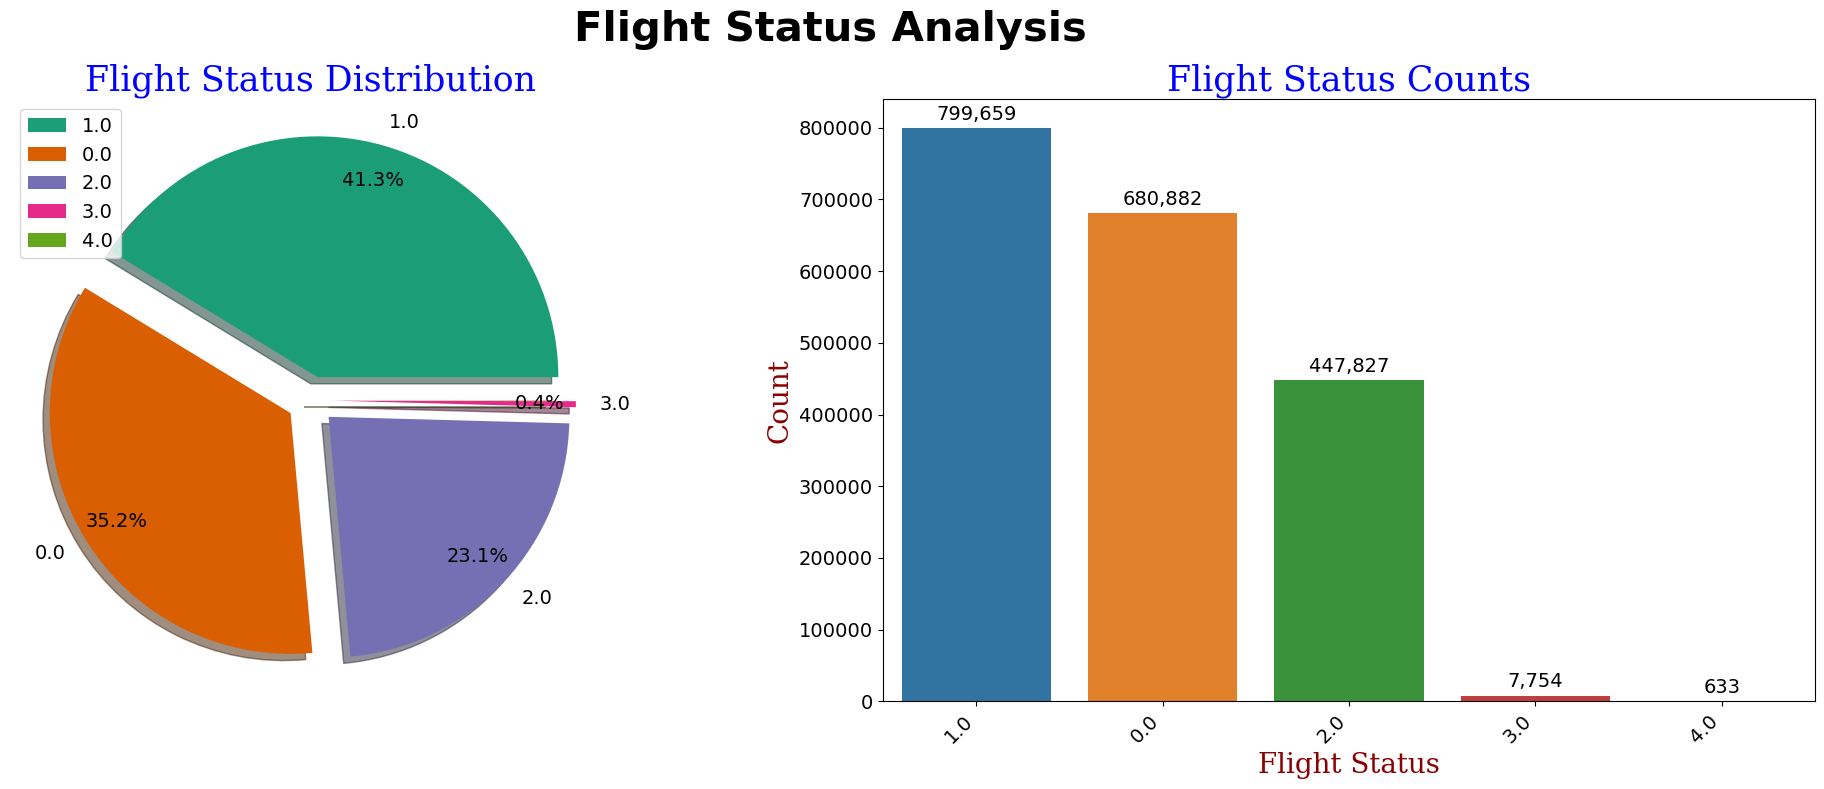

 Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or 
cancelled (4)  

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming concatenated_df is your DataFrame

f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the pie chart with adjusted autopct format and color palette
status_counts = concatenated_df["Status"].value_counts()
colors = sns.color_palette("Dark2", len(status_counts))

# Define a custom autopct function

legend_names = ['1.0', '0.0', '2.0', '3.0', '']
status_pie = status_counts.plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0],
                                    autopct=lambda p: '{:.1f}%'.format(p) if p > 0.3 else '',
                                    ax=ax[0],
                                    colors=colors,
                                    pctdistance=0.85,
                                    shadow=True, fontsize=14,
                                    labels=legend_names) 

# Define font1 and font2
font1 = {'family': 'serif', 'color': 'blue', 'size': 25}
font2 = {'family': 'serif', 'color': 'darkred', 'size': 20}

# Adding labels and title
ax[0].set_title("Flight Status Distribution", fontdict=font1, loc="center")
ax[0].set_ylabel("")
ax[0].legend(labels=status_counts.index, loc="upper left", fontsize=14)

# Formatting bar chart
sns.countplot(x="Status", order=status_counts.index,
              data=concatenated_df, ax=ax[1])
ax[1].set_title("Flight Status Counts", fontdict=font1, loc="center")
ax[1].set_xlabel("Flight Status", fontdict=font2)
ax[1].set_ylabel("Count", fontdict=font2)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

# Adding data labels and color customization
for p, label in zip(ax[1].patches, status_counts.index):
    height = p.get_height()
    ax[1].annotate(f"{height:,.0f}", (p.get_x() + p.get_width() / 2., height),
                   ha="center", va="center", xytext=(0, 10), textcoords="offset points", fontsize=14)
    if label == 4:  # Hide label for the 5th category
        p.set_label("")

# Overall layout adjustments
plt.suptitle("Flight Status Analysis", fontweight="bold", fontsize=30)
plt.tight_layout()
plt.show()

from rich.console import Console
console = Console()

message = 'Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)'

console.print(f'[bold] [size=16]{message} [/size] [/bold]')

• Most flights are on-time (35.2%), followed by delays (41.3%) and cancellations (23.1%).


• On-time flights are increasing, while delayed and cancelled flights are steady.


• Data for one month, one airport.

# Q.2 Reasons for cancelled flights

In [18]:
# Converting Categorical data to Numericwise category

concatenated_df.loc[concatenated_df["CancellationCode"] == "A", "CancellationCode"] = "0"
concatenated_df.loc[concatenated_df["CancellationCode"] == "B", "CancellationCode"] = "1"
concatenated_df.loc[concatenated_df["CancellationCode"] == "C", "CancellationCode"] = "2"

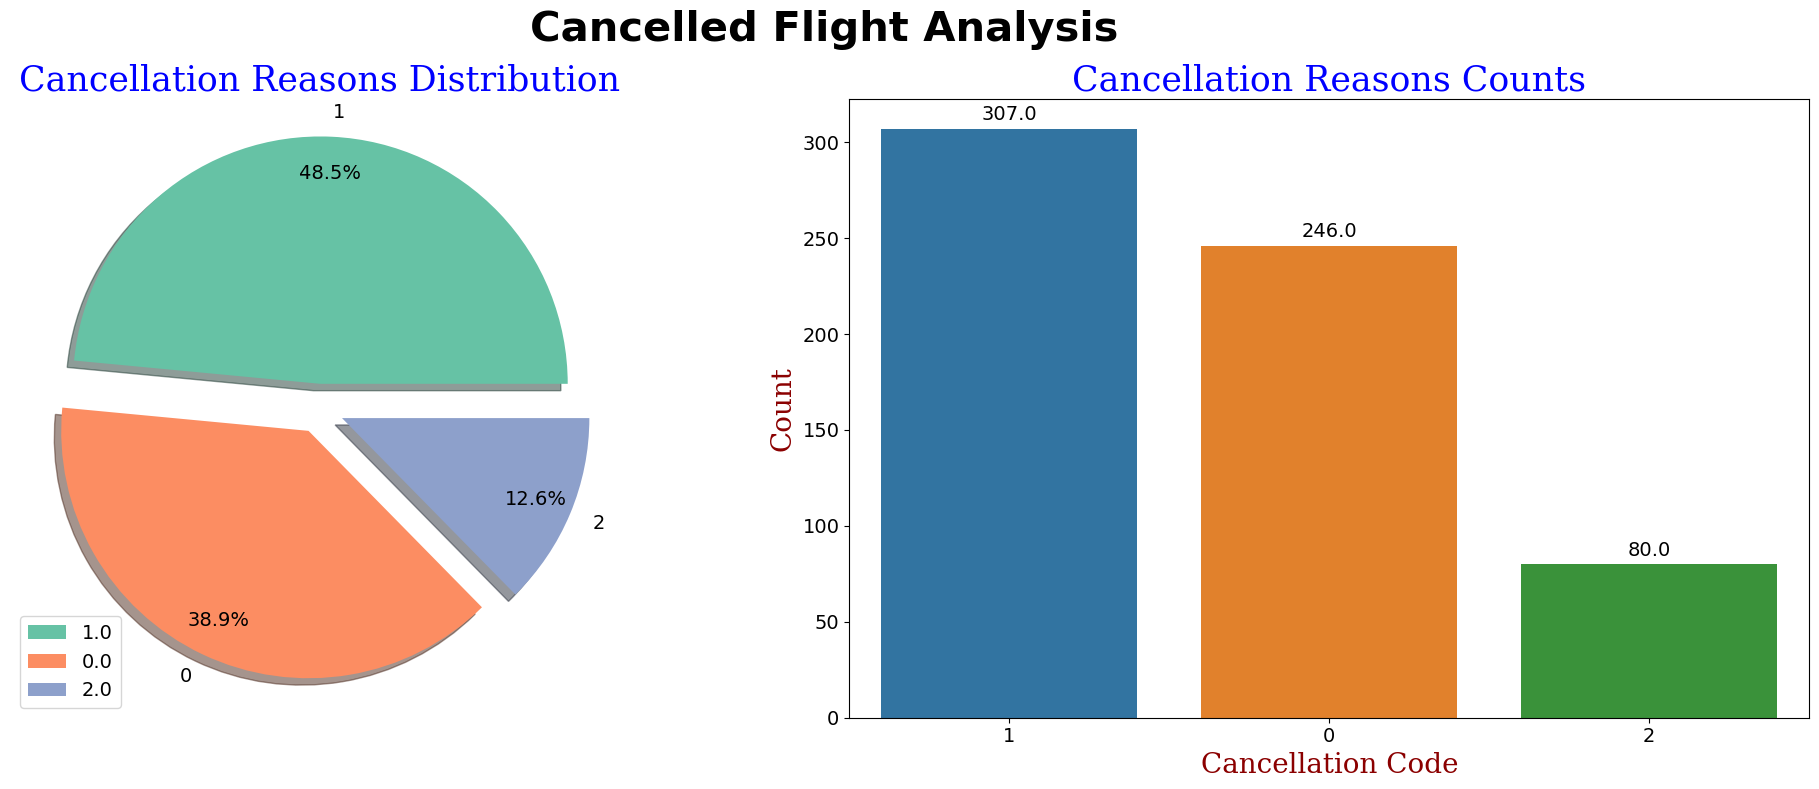

 Cancellation Codes:
0 = carrier, 1 = weather, 2 = NAS  

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have 'concatenated_df' and 'sns' imported

# Filter the DataFrame
Cancelflight = concatenated_df[(concatenated_df.Status == 4)]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Define font1 and font2
font1 = {'family':'serif','color':'blue','size':25}
font2 = {'family':'serif','color':'darkred','size':20}

# Plot pie chart
colors = sns.color_palette("Set2", len(status_counts))
Cancelflight["CancellationCode"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                                         autopct="%1.1f%%",
                                                         ax=ax[0],
                                                         colors=colors,
                                                         pctdistance=0.85,
                                                         shadow=True, fontsize=14)
ax[0].set_title("Cancellation Reasons Distribution", fontdict=font1, loc="center")
ax[0].set_ylabel("")
ax[0].legend(labels=status_counts.index, loc="lower left", fontsize=14)

# Plot countplot
sns.countplot(x="CancellationCode", order=Cancelflight["CancellationCode"].value_counts().index,
              data=Cancelflight, ax=ax[1])
ax[1].set_title("Cancellation Reasons Counts", fontdict=font1, loc="center")
ax[1].set_xlabel("Cancellation Code", fontdict=font2)
ax[1].set_ylabel("Count", fontdict=font2)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

# Adding data labels to the countplot
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

# Adding some formatting
plt.suptitle("Cancelled Flight Analysis", fontweight="bold", fontsize=30)
plt.tight_layout()

# Show the plot
plt.show()

from rich.console import Console
console = Console()

message = "Cancellation Codes:\n0 = carrier, 1 = weather, 2 = NAS"

console.print(f'[bold] [size=16]{message} [/size] [/bold]')

Weather is the top reason for cancellations (48.5%).


Cancellations vary daily.


Data from one airport, one month.

# Q.3 Flight Actual Durations vs Scheduled Duration (Excluding Cancelled or Diverted flight)

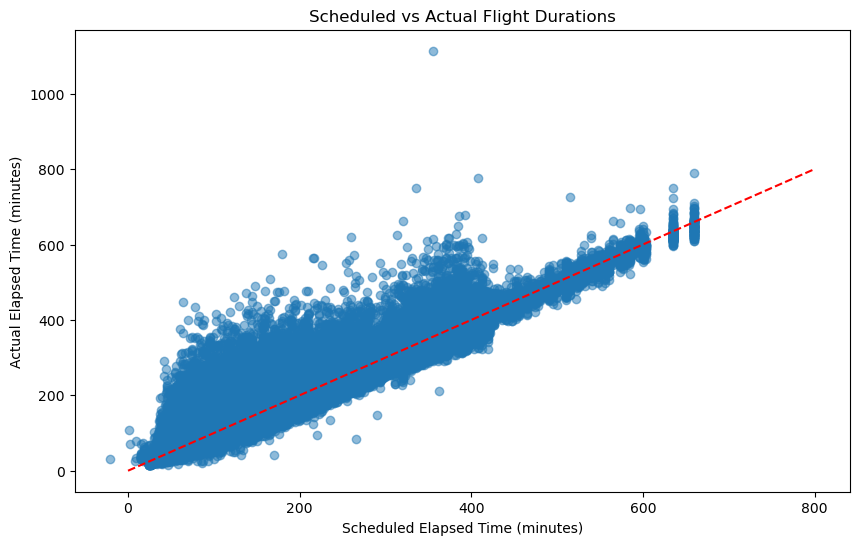

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CRSElapsedTime'], df['ActualElapsedTime'], alpha=0.5)
plt.plot([0, 800], [0, 800], color='red', linestyle='--', label='45-degree Line')
plt.title('Scheduled vs Actual Flight Durations')
plt.xlabel('Scheduled Elapsed Time (minutes)')
plt.ylabel('Actual Elapsed Time (minutes)')
plt.show()

• Most flights (upward trend) take longer than planned.


• Big difference in actual flight times (spread-out data).


• Reasons: weather, air traffic, technical issues, etc.

# Q.4 Explore Origin and Destination Analysis

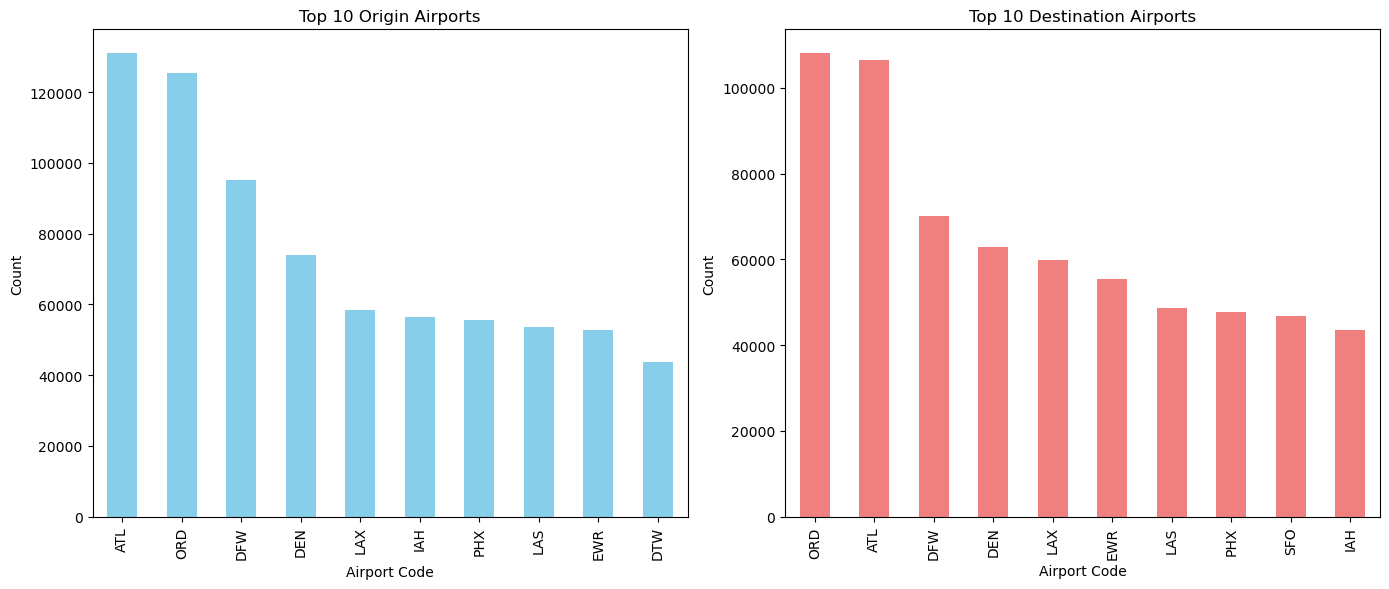

In [21]:
origin_counts = df['Origin'].value_counts().head(10)
dest_counts = df['Dest'].value_counts().head(10)

# Bar charts for Top 10 Origin and Destination Airports
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
origin_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Origin Airports')
plt.xlabel('Airport Code')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
dest_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Destination Airports')
plt.xlabel('Airport Code')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

• Busiest origins: ATL, DFW, DEN.


• Busiest destinations: MCO, ATL, LAX.


• Numbers show annual passenger traffic at each airport.

# Q.5 Arrival Delay for Origin Airports

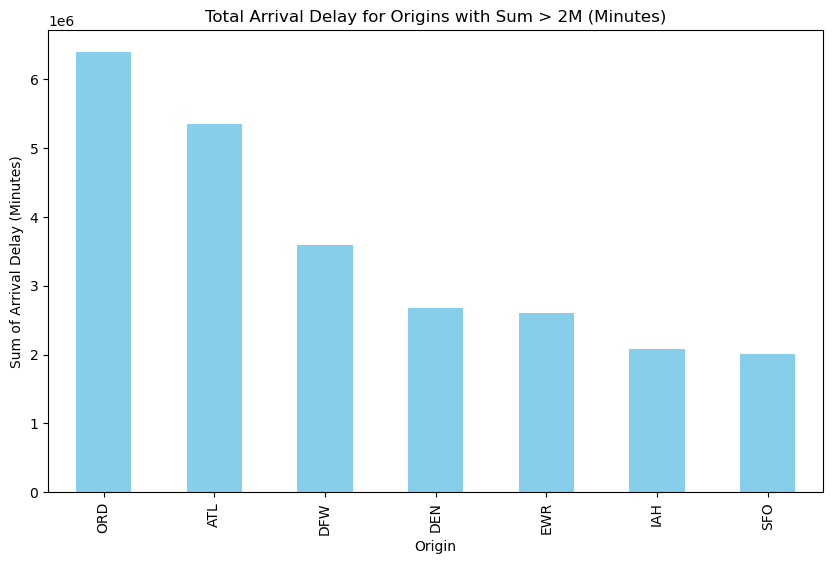

In [22]:
#data = df.groupby('Origin')['DepDelay',"ArrDelay"].sum()
data = df.groupby('Origin')['ArrDelay'].sum()

# Filter data based on the sum of 'ArrDelay' greater than 2000000
filtered_data = data[data > 2000000]

# Sort the data in descending order
filtered_data = filtered_data.sort_values(ascending=False)

# Plot the filtered data
filtered_data.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Arrival Delay for Origins with Sum > 2M (Minutes)')
plt.xlabel('Origin')
plt.ylabel('Sum of Arrival Delay (Minutes)')
plt.show()


Find out Max Arrival delay at which origin.


ORD having high delays.


It might be due to different delays.

# Q.6 Different Delays for ORD (Chicago)

In [23]:
#df.iloc[[df["ActualElapsedTime"]>800]].head()

data_ORD = df[(df["Origin"] == "ORD")][["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]
group_ORD = data_ORD.sum()
group_ORD


CarrierDelay         1770360.0
WeatherDelay          417122.0
NASDelay             1198039.0
SecurityDelay           2324.0
LateAircraftDelay    2883026.0
dtype: float64

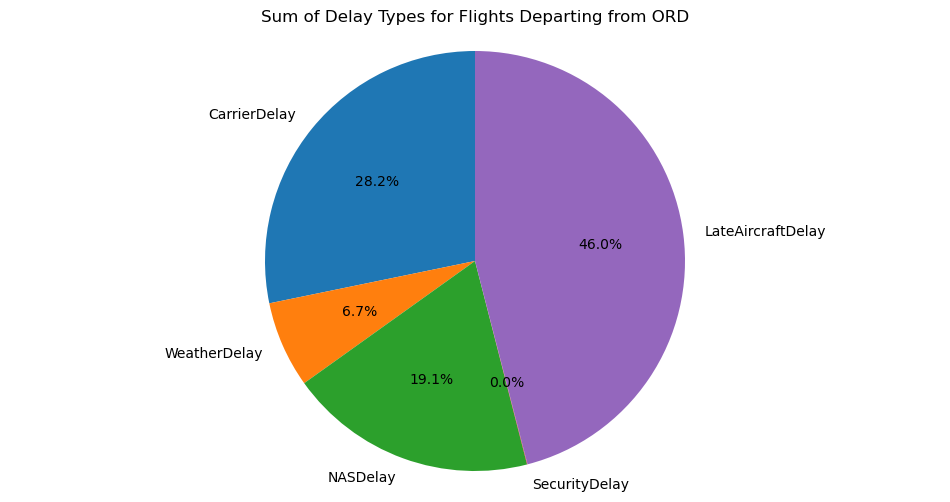

In [24]:
data_ORD = df[df["Origin"] == "ORD"][["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]

# Sum the delay types
group_ORD = data_ORD.sum()

# Plot a pie chart
plt.figure(figsize = (12,6))
plt.pie(group_ORD, labels=group_ORD.index, autopct='%1.1f%%', startangle=90)
plt.title('Sum of Delay Types for Flights Departing from ORD')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Show the pie chart
plt.show()

Find out different delays at ORD origin.


Max delay is due to Late aircraft.


At origin we can take care of carrier delay and NAS delay.

# Q.7 From where does the Late Aircraft Delay occur at ORD (chicago)

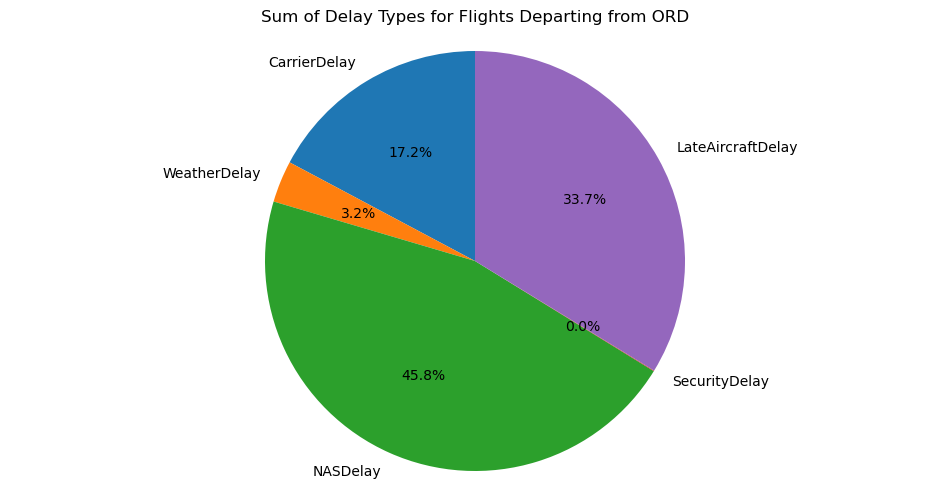

In [25]:
data_ORD = df[df["Dest"] == "ORD"][["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]

# Sum the delay types
group_ORD = data_ORD.sum()

# Plot a pie chart
plt.figure(figsize = (12,6))
plt.pie(group_ORD, labels=group_ORD.index, autopct='%1.1f%%', startangle=90)
plt.title('Sum of Delay Types for Flights Departing from ORD')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Show the pie chart
plt.show()

We want to find out where does aircraft delays at previous airport.


Find out that max delay was due to NAS Delay (45.8%).


Every airport which destined for ORD should take care of NAS Delay.


Other delays are Late Aircraft and Carrier delay

# Q.8 Which airports causing Aircraft delays at the ORD

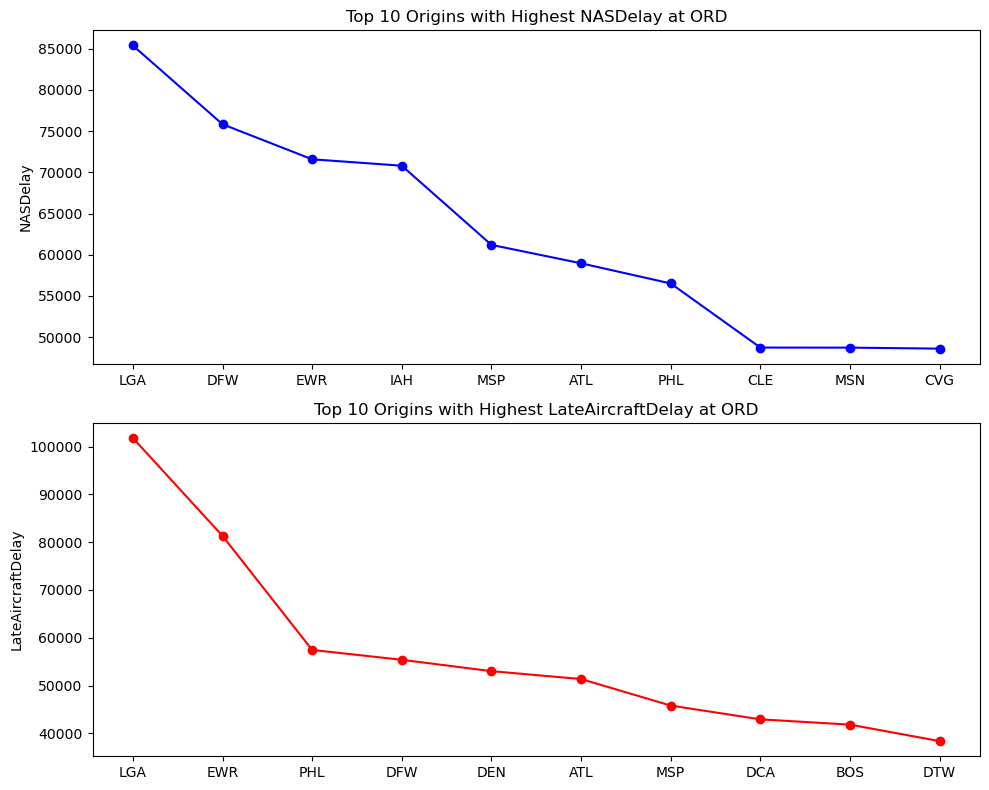

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter data for flights arriving at "ORD" and select relevant columns
data_ORD = df[df["Dest"] == "ORD"][["Origin", "NASDelay", "LateAircraftDelay"]]

# Group by "Origin" and sum the delays, then sort in descending order and take the top 10
filter_ORD_nas = data_ORD.groupby("Origin")["NASDelay"].sum().sort_values(ascending=False).head(10)
filter_ORD_late_aircraft = data_ORD.groupby("Origin")["LateAircraftDelay"].sum().sort_values(ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot NASDelay
axes[0].plot(filter_ORD_nas, marker='o', linestyle='-', color='b')
axes[0].set_title('Top 10 Origins with Highest NASDelay at ORD')
axes[0].set_ylabel('NASDelay')

# Plot LateAircraftDelay
axes[1].plot(filter_ORD_late_aircraft, marker='o', linestyle='-', color='r')
axes[1].set_title('Top 10 Origins with Highest LateAircraftDelay at ORD')
axes[1].set_ylabel('LateAircraftDelay')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


Which different airport causing Late aircraft delay.


Find out by NAS Delay and Late aircraft delay.


Found out these Top 10 delays.

# Q.9 Which Air craft got highest Carrier Delay

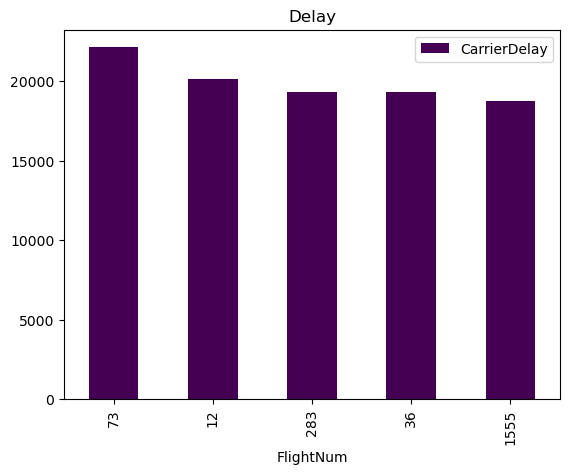

In [27]:
# Group by "FlightNum" and sum the delay types
df_New = df.groupby("FlightNum")[["CarrierDelay"]].sum()

# Filter FlightNums with total delay above 18,000 minutes
filter_threshold = 18000
df_New = df_New[df_New.sum(axis=1) > filter_threshold]

df_New.sort_values(by="CarrierDelay", ascending=False).plot(kind='bar', colormap='viridis', title='Delay')

plt.show()

Which are the aircraft having high carrier delay.


It may be due to poor maintenance of aircrafts.


Chart shows top 5 aircraft delays.

# Q.10 Delay Analysis (Monthly)

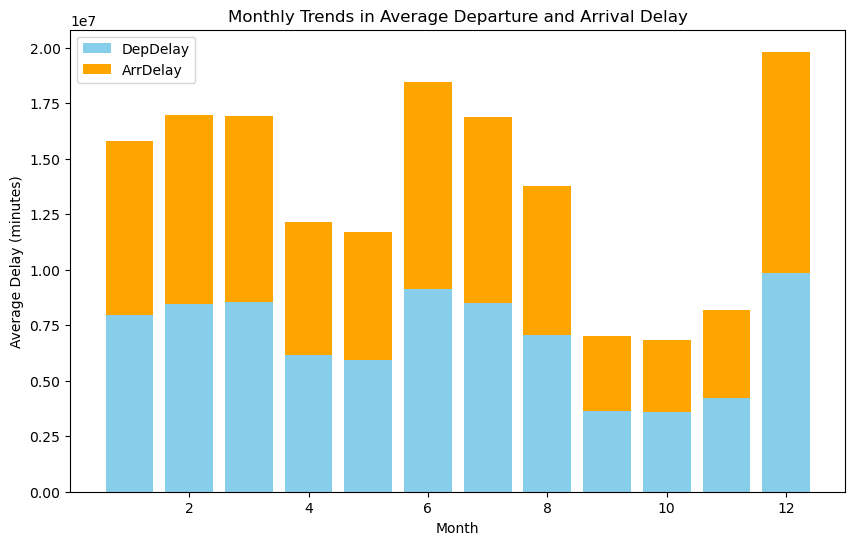

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Group by 'Month' and calculate the mean of 'DepDelay' and 'ArrDelay'
monthly_delay_trends = df.groupby('Month')[['DepDelay', 'ArrDelay']].sum()

plt.figure(figsize=(10, 6))

# Plot stacked bar chart
plt.bar(monthly_delay_trends.index, monthly_delay_trends['DepDelay'], color='skyblue', label='DepDelay')
plt.bar(monthly_delay_trends.index, monthly_delay_trends['ArrDelay'], bottom=monthly_delay_trends['DepDelay'], color='orange', label='ArrDelay')

plt.title('Monthly Trends in Average Departure and Arrival Delay')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.show()


# Q.11 What is the cause that Month 9, 10, 11 got less Delays?

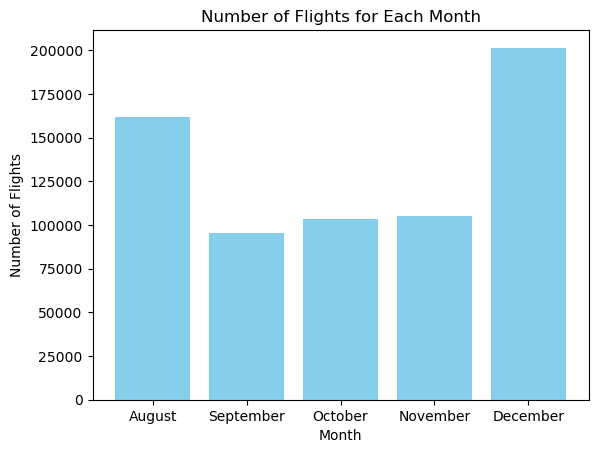

In [29]:
# Filter data for each month
df_08 = df[df["Month"] == 8]
df_09 = df[df["Month"] == 9]
df_10 = df[df["Month"] == 10]
df_11 = df[df["Month"] == 11]
df_12 = df[df["Month"] == 12]

# Get counts of FlightNum for each month
counts = [df_08["FlightNum"].count(), df_09["FlightNum"].count(), df_10["FlightNum"].count(), df_11["FlightNum"].count(), df_12["FlightNum"].count()]

# Create bar chart
months = ['August', 'September', 'October', 'November', 'December']
plt.bar(months, counts, color='skyblue')
plt.title('Number of Flights for Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()


The graph depicts a consistent rise in the number of flights from August to December, with a sharper increase noticeable in November and December. 

This surge could be due to heightened holiday travel demand, airlines adjusting schedules to meet seasonal preferences, and an upswing in end-of-year business travel, all contributing to the significant rise in air travel during these months.

# Q.12 What are the different delays (Monthly)

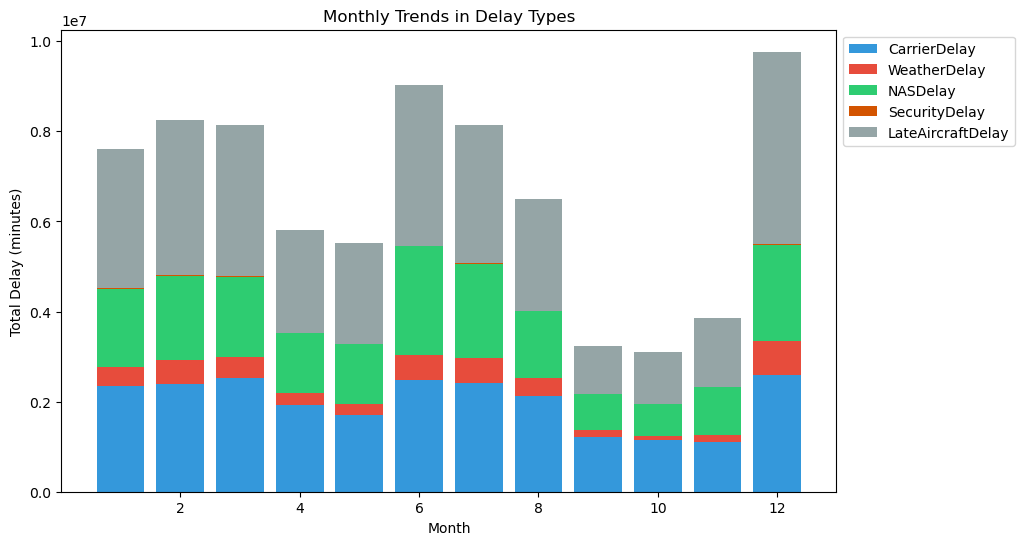

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Group by 'Month' and calculate the sum of delay types
monthly_delay_trends = df.groupby('Month')[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]].sum()

plt.figure(figsize=(10, 6))

# Plot stacked bar chart with vibrant colors
plt.bar(monthly_delay_trends.index, monthly_delay_trends['CarrierDelay'], color='#3498db', label='CarrierDelay')
plt.bar(monthly_delay_trends.index, monthly_delay_trends['WeatherDelay'], bottom=monthly_delay_trends['CarrierDelay'], color='#e74c3c', label='WeatherDelay')
plt.bar(monthly_delay_trends.index, monthly_delay_trends['NASDelay'], bottom=monthly_delay_trends['CarrierDelay'] + monthly_delay_trends['WeatherDelay'], color='#2ecc71', label='NASDelay')
plt.bar(monthly_delay_trends.index, monthly_delay_trends['SecurityDelay'], bottom=monthly_delay_trends['CarrierDelay'] + monthly_delay_trends['WeatherDelay'] + monthly_delay_trends['NASDelay'], color='#d35400', label='SecurityDelay')
plt.bar(monthly_delay_trends.index, monthly_delay_trends['LateAircraftDelay'], bottom=monthly_delay_trends['CarrierDelay'] + monthly_delay_trends['WeatherDelay'] + monthly_delay_trends['NASDelay'] + monthly_delay_trends['SecurityDelay'], color='#95a5a6', label='LateAircraftDelay')

plt.title('Monthly Trends in Delay Types')
plt.xlabel('Month')
plt.ylabel('Total Delay (minutes)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


The data reveals that CarrierDelay consistently dominates as the most significant delay type, indicating that airline-related issues play a major role in overall delays. 


WeatherDelay and NASDelay show a gradual increase from February to December, potentially influenced by changing weather patterns and airspace system issues.


Security Delay remains relatively stable without notable fluctuations.


 LateAircraftDelay is the least common delay type, consistently showing the lowest values throughout the year, implying it has less impact on overall delays compared to other factors.

# Q.13 Explore Arrival Delays with respect to Carrier

<Figure size 1300x800 with 0 Axes>

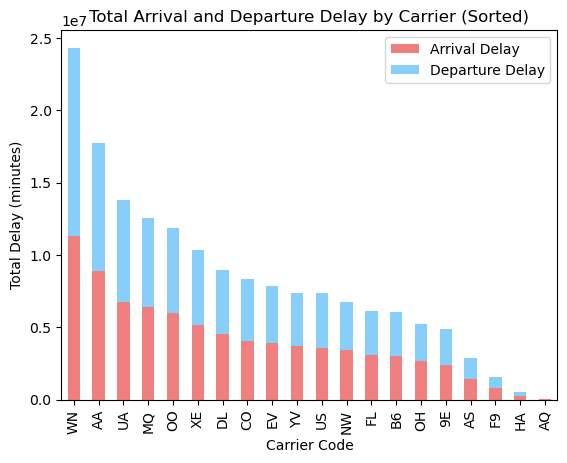

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Group by 'UniqueCarrier' and calculate the sum of 'ArrDelay' and 'DepDelay'
total_delay_by_carrier = df.groupby('UniqueCarrier')[['ArrDelay', 'DepDelay']].sum()

# Calculate the total delay for each carrier
total_delay_by_carrier['TotalDelay'] = total_delay_by_carrier['ArrDelay'] + total_delay_by_carrier['DepDelay']

# Sort the DataFrame by total delay in descending order
total_delay_by_carrier_sorted = total_delay_by_carrier.sort_values(by='TotalDelay', ascending=False)

plt.figure(figsize=(13, 8))

# Plot a stacked bar chart without transparency
total_delay_by_carrier_sorted[['ArrDelay', 'DepDelay']].plot(kind='bar', stacked=True, color=['lightcoral', 'lightskyblue'])

plt.title('Total Arrival and Departure Delay by Carrier (Sorted)')
plt.xlabel('Carrier Code')
plt.ylabel('Total Delay (minutes)')
plt.legend(["Arrival Delay", "Departure Delay"], loc='upper right')
plt.show()


From this we can say that there is lest amount of dealy in Aloha Airlines and highest in Southwest Airlines.

# Q.14 Explore the Reasons for Delays

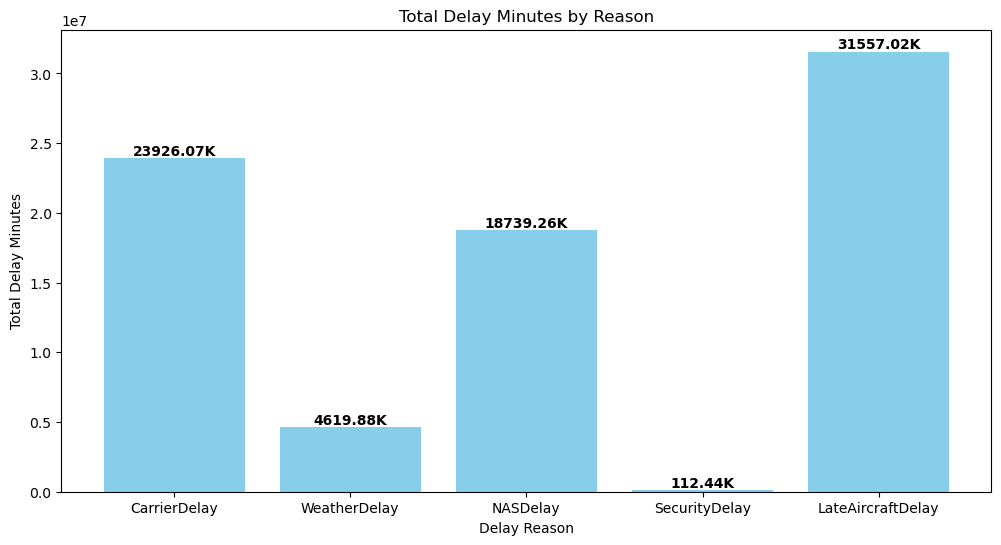

In [32]:
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_reasons = df[delay_columns].sum()

# Convert data labels to K or M
delay_reasons_in_k = delay_reasons / 1000
delay_reasons_in_m = delay_reasons / 1_000_000

# Bar chart for Delay Reasons
plt.figure(figsize=(12, 6))
bars = plt.bar(delay_reasons.index, delay_reasons.values, color='skyblue')
plt.title('Total Delay Minutes by Reason')
plt.xlabel('Delay Reason')
plt.ylabel('Total Delay Minutes')

# Add data labels to the bars (in K)
for bar, value in zip(bars, delay_reasons_in_k):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{value:.2f}K', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

The data underscores CarrierDelay as the primary cause of delays, surpassing 31 million minutes, prompting a need for airlines to address internal issues for better performance.


 Weather-related delays, totaling over 23 million minutes, emphasize the impact of weather disruptions, necessitating robust contingency plans.
 

 Additionally, delays attributed to the National Airspace System (NASDelay), exceeding 18 million minutes, highlight the significance of efficient air traffic management and infrastructure.
 

 SecurityDelay and LateAircraftDelay are less frequent contributors, with 4.6 million and 0.1 million minutes, respectively, signaling their comparatively lower impact on overall delays

# Q.15 Investigate Security Delays

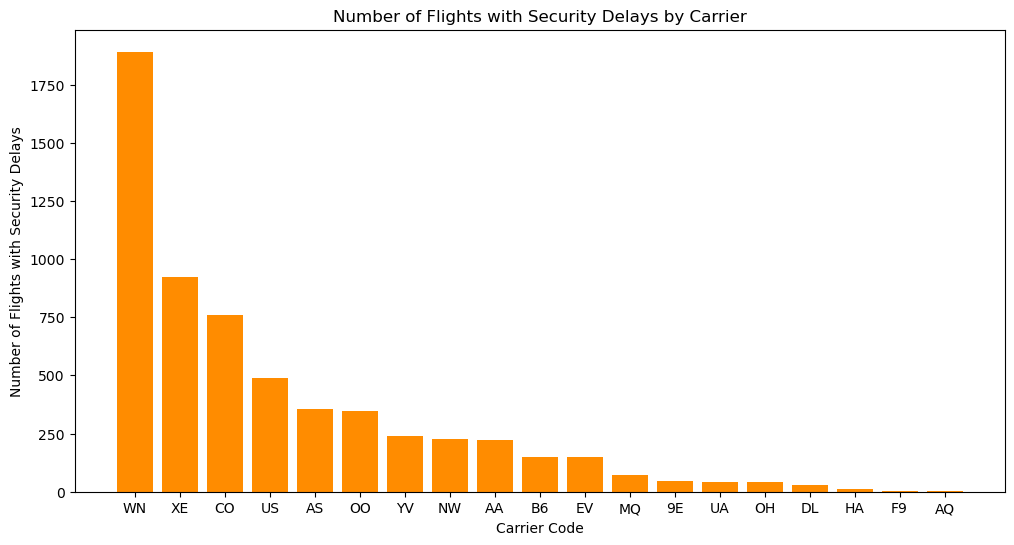

In [33]:
security_delays = df[df['SecurityDelay'] > 0]

# Bar chart for Number of Flights with Security Delays by Carrier
security_delay_by_carrier = security_delays.groupby('UniqueCarrier').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(security_delay_by_carrier.index, security_delay_by_carrier.values, color='darkorange')
plt.title('Number of Flights with Security Delays by Carrier')
plt.xlabel('Carrier Code')
plt.ylabel('Number of Flights with Security Delays')
plt.show()


we can see the highest security delay is happening in the carrier(WN, XE, XE, US, AS).


There might be a reason that there are fewer baggage counters and technical malfunctions

# Q.16 Analyzing week days delays

<Figure size 1300x800 with 0 Axes>

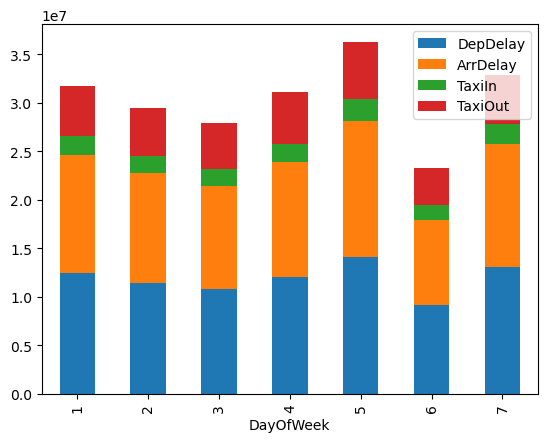

In [34]:
df_by_day = df.groupby("DayOfWeek")[['DepDelay', 'ArrDelay','TaxiIn', 'TaxiOut']].sum()
plt.figure(figsize=(13,8))
df_by_day.plot(kind="bar", stacked=True)
plt.show()

We observe that Fridays experience the highest delays.


This could be due to more people travelling home on Fridays and returning on Sundays. The trend indicates a decrease in delays on Saturdays.

# Q.17.Daily shift wise Analysis:

<Figure size 1500x800 with 0 Axes>

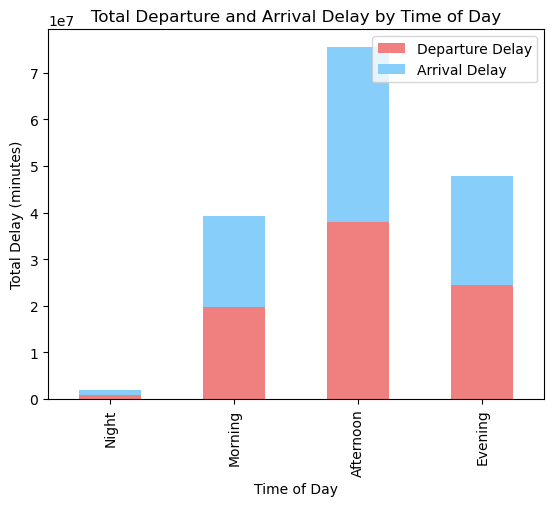

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Create a new column 'DelayTimeCategory' based on departure time
df['DelayTimeCategory'] = pd.cut(df['CRSDepTime'], bins=[0, 600, 1200, 1800, 2400], labels=['Night', 'Morning', 'Afternoon', 'Evening'], include_lowest=True)

# Group by 'DelayTimeCategory' and calculate the sum of 'DepDelay' and 'ArrDelay'
df_by_time_category = df.groupby("DelayTimeCategory")[['DepDelay', 'ArrDelay']].sum()

# Increase the figure size using the plt.figure() before plotting
plt.figure(figsize=(15, 8))

# Plot a stacked bar chart for Departure Delay and Arrival Delay
df_by_time_category[['DepDelay', 'ArrDelay']].plot(kind="bar", stacked=True, color=['lightcoral', 'lightskyblue'])

plt.title('Total Departure and Arrival Delay by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Delay (minutes)')
plt.legend(["Departure Delay", "Arrival Delay"], loc='upper right')

plt.show()


We observe that most flights experience delays in the evening, while delays are less frequent at night.


Adjusting flight timings and optimizing airport infrastructure can help manage crowds. Consider rescheduling flights to nighttime if it is feasible

# Scatter Animation

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame named 'df' with columns like "ArrDelay," "DepDate," "FlightNum," "DepDelay," and "Distance"
# Replace 'df' with the actual DataFrame name containing your data

df_copy = df.copy()

# Convert 'DepDate' to string
df_copy['DepDate'] = df_copy['DepDate'].astype(str)

# Calculate the sum of values in each row for the specified columns
df_copy['BubbleSize'] = df_copy[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum(axis=1)

# Filter the DataFrame based on the condition for 'BubbleSize'
df_copy = df_copy[df_copy['BubbleSize'] > 200]

fig = px.scatter(df_copy, x="DepDelay", y="ArrDelay", animation_frame="DepDate", animation_group="UniqueCarrier",
                 size="BubbleSize", color="UniqueCarrier", hover_data=["UniqueCarrier"])

# Set the x-axis and y-axis range
#fig.update_layout(xaxis=dict(range=[0, 400]), yaxis=dict(range=[0, 200]))

X = df_copy["DepDelay"].values.reshape(-1, 1)
y = df_copy["ArrDelay"].values
regressor = LinearRegression().fit(X, y)
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Add the regression line
fig.add_shape(type='line',
              x0=df_copy["DepDelay"].min(), x1=df_copy["DepDelay"].max(),
              y0=slope * df_copy["DepDelay"].min() + intercept, y1=slope * df_copy["DepDelay"].max() + intercept,
              line=dict(color='black', width=2, dash='dash'))

fig.write_html('animated_output.html')

fig.show()

airline_names = {
    'WN': 'Southwest Airlines',
    'AA': 'American Airlines',
    'MQ': 'American Eagle Airlines',
    'UA': 'United Airlines',
    'OO': 'Skywest Airlines',
    'DL': 'Delta Airlines',
    'XE': 'ExpressJet',
    'CO': 'Continental Airlines',
    'US': 'US Airways',
    'EV': 'Atlantic Southeast Airlines',
    'NW': 'Northwest Airlines',
    'FL': 'AirTran Airways',
    'YV': 'Mesa Airlines',
    'B6': 'JetBlue Airways',
    'OH': 'Comair',
    '9E': 'Pinnacle Airlines',
    'AS': 'Alaska Airlines',
    'F9': 'Frontier Airlines',
    'HA': 'Hawaiian Airlines',
    'AQ': 'Aloha Airlines'
}

# Print the entire list of airline codes and names
for code, name in airline_names.items():
    print(f'{code}: {name}')


In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame named 'df' with columns like "ArrDelay," "DepDate," "FlightNum," "DepDelay," and "Distance"
# Replace 'df' with the actual DataFrame name containing your data

df_copy = df.copy()

# Convert 'DepDate' to string
df_copy['DepDate'] = df_copy['DepDate'].astype(str)

# Calculate the sum of values in each row for the specified columns
df_copy['BubbleSize'] = df_copy[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum(axis=1)

# Filter the DataFrame based on the condition for 'BubbleSize'
df_copy = df_copy[df_copy['BubbleSize'] > 200]

# Calculate the overall ratio for the entire dataset
overall_ratio = df_copy['ArrDelay'].sum() / df_copy['DepDelay'].sum()

# Create the scatter plot with facets
fig = px.scatter(df_copy, x="DepDelay", y="ArrDelay", facet_col="Month", facet_col_wrap=5,
                 size="BubbleSize", color="UniqueCarrier", hover_data=["UniqueCarrier"])

fig.show()


we observe the daily delays of unique carriers, specifically OH, NH, MQ, and AA. 


These carriers are suggested for optimization in terms of their timings and maintenance 